In [1]:
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from display_network import *
np.random.seed(1)

In [2]:

mntrain = MNIST('../Database/MNIST/') #đường dẫn đến folder Mnist
mntrain.load_training() # lấy dữ liệu training
Xtrain_all = np.asarray(mntrain.train_images) # đưa các ảnh về dạng np.array
ytrain_all = np.array(mntrain.train_labels.tolist()) # lấy các nhãn thực tế của từng ảnh

mntest = MNIST('../Database/MNIST/')
mntest.load_testing() # lấy dữ liệu testing
Xtest_all = np.asarray(mntest.test_images) # đưa các ảnh test về dạng np.array
ytest_all = np.array(mntest.test_labels.tolist()) # lấy nhãn test của từng ảnh

In [3]:
cls = [[4], [5]] # mỗi ảnh sẽ có 1 label, chúng ta muốn phân loại nhóm nào thì đưa nó vào đây (2 loại)

In [4]:
def extract_data(X, y, classes): # giải nén và chuẩn hóa
    """
    X: numpy array, matrix of size (N, d), d is data dim
    y: numpy array, size (N, )
    cls: two lists of labels. For example: 
        cls = [[1, 4, 7], [5, 6, 8]]
    return:
        X: extracted data
        y: extracted label 
            (0 and 1, corresponding to two lists in cls)
    """
    y_res_id = np.array([]) # mảng tạm thời 
    for i in cls[0]: # với các số thuộc nhóm đầu tiên ví dụ cls=[[1, 2], [3, 4]] thì 1 2 sẽ cùng 1 nhóm
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0])) # nối thêm các label thuộc cùng 1 nhóm vào đằng sau y_res_id
    n0 = len(y_res_id) # lấy số lượng các nhãn nhóm 1

    for i in cls[1]: # với các số thuộc nhóm thứ 2 ví dụ cls=[[1, 2], [3, 4]] thì 3 4 sẽ cùng 1 nhóm
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0])) # nối thêm các label thuộc cùng 1 nhóm vào đằng sau y_res_id
    n1 = len(y_res_id) - n0  # số lượng các nhãn nhóm 2 sẽ bằng tổng trừ đi nhãn nhóm 1
    print(y_res_id.dtype)
    y_res_id = y_res_id.astype(int) # đưa các nhãn từ float64 về dạng int
    X_res = X[y_res_id, :]/255.0 # y_res_id là 1 mảng các phần tử nên X[y_res_id, :] sẽ lấy các dòng có chỉ số 
                                 #tương ứng với giá trị của y_res_id, chuẩn hóa về [0, 1]
    y_res = np.asarray([0]*n0 + [1]*n1) # gán nhãn cho các dòng của X_res, gán nhãn 0 1 vì logistic regression
    return (X_res, y_res)


# extract data for training 
(X_train, y_train) = extract_data(Xtrain_all, ytrain_all, cls)

# extract data for test 
(X_test, y_test) = extract_data(Xtest_all, ytest_all, cls)

float64
float64


Hàm `np.where(y==value)` trả về 1 tuple có dạng `(array([   2,    5,   14, ..., 9978, 9984, 9994], dtype=int64),)`, vì vậy muốn lấy các chỉ số thì cần lấy phần tử đầu tiên của tuple tức là `np.where(y==value)[0]`

In [5]:
# train the logistic regression model 
logreg = linear_model.LogisticRegression(C=1e5) # just a big number 
logreg.fit(X_train, y_train)

# predict 
y_pred = logreg.predict(X_test)
print ("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy: 98.72 %


C:\Users\Quang Huy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


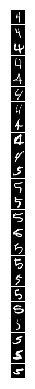

In [6]:
# display misclassified image(s)
mis = np.where((y_pred - y_test) != 0)[0]
Xmis = X_test[mis, :]

plt.axis('off')
A = display_network(Xmis.T, Xmis.shape[0], 1)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

In [7]:
print(np.where(ytest_all == 1))

(array([   2,    5,   14, ..., 9978, 9984, 9994], dtype=int64),)
